<a href="https://colab.research.google.com/github/Naoki0424/my_document/blob/main/20211021_TensorFlow_by_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kerasを触ってみる

## TensorFlowのVerを設定する

In [2]:
%tensorflow_version 2.x

## ライブラリのインポート

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

from tensorflow.keras import layers, models

## 事前データ作成

In [9]:
# 目的変数
train_t = np.array([5.2, 5.7, 6.7, 8.9, 13.2, 15.3, 20.5, 29.2, 20.0, 19.2, 10.2, 9])
train_t = train_t.reshape([12, 1])
# 説明変数
train_x = np.array([[mon**n for n in range(1, 5)] for mon in range(1, 13)])

In [10]:
train_t

array([[ 5.2],
       [ 5.7],
       [ 6.7],
       [ 8.9],
       [13.2],
       [15.3],
       [20.5],
       [29.2],
       [20. ],
       [19.2],
       [10.2],
       [ 9. ]])

In [11]:
train_x

array([[    1,     1,     1,     1],
       [    2,     4,     8,    16],
       [    3,     9,    27,    81],
       [    4,    16,    64,   256],
       [    5,    25,   125,   625],
       [    6,    36,   216,  1296],
       [    7,    49,   343,  2401],
       [    8,    64,   512,  4096],
       [    9,    81,   729,  6561],
       [   10,   100,  1000, 10000],
       [   11,   121,  1331, 14641],
       [   12,   144,  1728, 20736]])

## 予測値を計算する式を定義する

In [12]:
model = models.Sequential()
model.add(layers.Dense(1, input_shape=(4, ), name='polynomial'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
polynomial (Dense)           (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


`models.Sequential()`でニューラルネットワークのモデルを定義しています。それに対して`.add()`を使用することで層を積み上げることができます。

`layers.Dense`は全結合層を表しています。引数の一つ目の'1'はノード数を表しています。このモデルを式に表すと下記になります。

※後でノードの図形を書き足したい

$$
y = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + w_{4}x_{4} + b
$$

この式では入力値は

$$(x_{1}, x_{2}, x_{3}, x_{4})$$

の4つの数字となっていますが、これは`layers.Dense`の２番目の引数である`input_shape=(4, ),`と対応しています。ノードに対する入力は一般的には多次元のリストになるのでこのオプションはタプルで入力を行う必要があります。

(4)はタプルとはみなされないので、(4, )と書きます。

`name='polynomial'`は層の名前を設定しています。

`model.summary()`でネットワークの構成を見入ることができます。

Layer (type) に設定した名前であるpolynomialが存在しています。Output Shapeにはこの層から出力されるリストの形状が記載されています。Noneとあるのは複数の組みのデータが入力された時はそれと同様の組みを出力されるという意味です。

Param #には調整すべきパラメータの数が記載されています。この例で言うと下記となります。

$$(x_{1}, x_{2}, x_{3}, x_{4}), b$$

これらはLow-level APIで言うVariableに対応しています。

Kerasではレイヤーの構成を行うことで自動的にVariableを定義することができます。

## 誤差関数を定義する

In [13]:
model.compile(optimizer='adam', loss='mse')

`compile()`を用いることで誤差関数と最適化アルゴリズムを同時に指定しています。

`optimizer=`では最適化アルゴリズムを指定しています。`loss=`では誤差関数を指定しています

## 学習処理

In [14]:
history = model.fit(train_x, train_t, batch_size=12, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 477ms/step - loss: 10953838.0000
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 10894044.0000
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 10834415.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 10774960.0000
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 10715676.0000
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 10656570.0000
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 10597643.0000
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 10538896.0000
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 10480334.0000
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 10421959.0000


`fit()`の初めの２つのオプションには学習データと正解ラベルを与えています。

`epochs=`ではパラメータの更新回数を表しています。学習が進むごとに誤差関数の結果が減っているのが分かります。

In [15]:
history = model.fit(train_x, train_t, batch_size=12, epochs=100000, verbose=0)

`verbose=`は中間結果の表示を抑制する設定です。

lossの結果を表示すると下記になります。`xlim=(0, 2000)`を設定することで2000回目のエポックまでの結果を出力しています

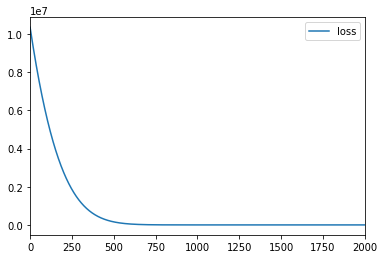

In [17]:
DataFrame({'loss': history.history['loss']}).plot(xlim=(0, 2000))

## 評価

In [19]:
model.get_weights()

[array([[-1.9535834e+00],
        [ 1.1182474e+00],
        [-7.1268976e-02],
        [-6.3668034e-04]], dtype=float32), array([5.0752053], dtype=float32)]

調整後のパラメータの値を確認します。１つ目のarrayオブジェクトにw、2つ目のarrayオブジェクトにbのパラメータを保持しています

In [23]:
w, b = model.get_weights()
def predict(x):
  pred = b[0] + sum(w[n][0] * x**(n+1) for n in range(0, 4))
  return pred

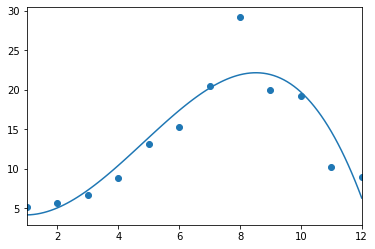

In [24]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlim(1, 12)
subplot.scatter(range(1, 13), train_t)
xs = np.linspace(1, 12, 100)
ys = predict(xs)
subplot.plot(xs, ys)